In [145]:
%config Completer.use_jedi = False

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
from enm.Enm import Enm, rewire_network
from enm.utils import *

In [3]:
e = Enm('rew')

In [6]:
e.read_network('../data/interim/costanzo_pcc_ALL',sep=',')

In [11]:
gc_rew = rewire_network(e.graph_gc)

In [12]:
gc_rew

In [13]:
e_rew = Enm('rewired')

In [14]:
e_rew.G=gc_rew

In [15]:
e_rew.giant_component()

In [16]:
e_rew.gnm_analysis()

@> 5182 modes were calculated in 22.41s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


In [26]:
strain_ids =pd.read_csv('../data/interim/strain_ids.csv')
e_rew.df = pd.merge(e_rew.df,strain_ids, left_on='orf_name',right_on='gene1')

In [28]:
e_rew.get_sensor_effector(True)

In [22]:
goea, geneid2name = create_goea(gaf='../data/raw/ontology/sgd.gaf', obo='../data/raw/ontology/go-basic.obo',background='../data/interim/go_background_list',
                               sdg_info_tab='../data/raw/ontology/SGD_features.tab')

../data/raw/ontology/go-basic.obo: fmt(1.2) rel(2021-05-01) 47,284 GO Terms; optional_attrs(relationship)
HMS:0:00:00.857779  41,910 annotations READ: ../data/raw/ontology/sgd.gaf BP

Load BP Gene Ontology Analysis ...
Propagating term counts up: is_a and negatively_regulates part_of positively_regulates regulates


46 GO IDs NOT FOUND IN ASSOCIATION: GO:0035955 GO:1900524 GO:0061416 GO:0035392 GO:1902353 GO:0001324 GO:0061404 GO:0001319 GO:0018192 GO:1900466 GO:0061427 GO:0009108 GO:1900062 GO:0035961 GO:0061393 GO:1900462 GO:1900473 GO:0061392 GO:1900472 GO:0035952 GO:0001320 GO:0018065 GO:1900526 GO:0001302 GO:0055114 GO:0001308 GO:1990872 GO:0097236 GO:1902352 GO:0034225 GO:0090203 GO:0010978 GO:0048310 GO:0071733 GO:0072321 GO:1900465 GO:0035969 GO:0072363 GO:0001300 GO:1903474 GO:1900008 GO:1900525 GO:0090202 GO:0090579 GO:0000733 GO:0051188


 82%  4,649 of  5,672 population items found in association


In [29]:
e_rew.analyze_components_biology(goea, geneid2name,True)
e_rew.analyze_components_biology(goea, geneid2name,False)

/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)



Run BP Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5672)
Calculating 4,999 uncorrected p-values using fisher
   4,999 GO terms are associated with  4,623 of  5,672 population items
      88 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010576413937897666
Sample 10 / 500: p-value 0.0010576413937897666
Sample 20 / 500: p-value 0.006334663627985458
Sample 30 / 500: p-value 0.0015861823243049813
Sample 40 / 500: p-value 0.004226090628537098
Sample 50 / 500: p-value 0.0005289139633310729
Sample 60 / 500: p-value 0.0036984817044686314
Sample 70 / 500: p-value 0.002114536787698157
Sample 80 / 500: p-value 0.0036984817044686314
Sample 90 / 500: p-value 0.0005289139633310729
Sample 100 / 500: p-value 0.0010576413937897666
Sample 110 / 500: p-value 7.2376070918536355e-09
Sample 120 / 500: p-value 0.0010576413937897666
Sample 130 / 500: p-value 0.0015861823243049813
Sample 140 / 500: p-value 0.0005289139633310729
Sample 150 / 500: p-value 0.0005289139633310729
Sample 160 / 500: p-value 0.0005289139633310729
Sample 170 / 500: p-value 0.0015861823243049813
Sample 180 / 500: p-value 1
Sample 190 / 500: p-value 0.000275275

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['go_group'] = None
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Run BP Gene Ontology Analysis: current study set of 48 IDs ...100%     48 of     48 study items found in association
100%     48 of     48 study items found in population(5672)
Calculating 4,999 uncorrected p-values using fisher
   4,999 GO terms are associated with  4,623 of  5,672 population items
     764 GO terms are associated with     48 of     48 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.00020927106649511155
Sample 10 / 500: p-value 0.0006900510655257658
Sample 20 / 500: p-value 0.0010294875197962895
Sample 30 / 500: p-value 0.00029488082004864484
Sample 40 / 500: p-value 0.005154673966704843
Sample 50 / 500: p-value 0.0006900510655257658
Sample 60 / 500: p-value 0.0024310054797280862
Sample 70 / 500: p-value 0.003022384894237961
Sample 80 / 500: p-value 0.0014335043654629758
Sample 90 / 500: p-value 0.0014335043654629758
Sample 100 / 500: p-value 0.0004162796531294439
Sample 110 / 500: p-value 0.0012900892904784487
Sample 120 / 500: p-value 0.00190102994918233
Sample 130 / 500: p-value 0.00020927106649511155
Sample 140 / 500: p-value 0.0027213076489718394
Sample 150 / 500: p-value 0.00010479354107818101
Sample 160 / 500: p-value 0.001967286349223683
Sample 170 / 500: p-value 0.00190102994918233
Sample 180 / 500: p-value 0.0014335043654629758
Sample 190 / 500: 

  METHOD fdr:
      14 GO terms found significant (< 0.1=alpha) ( 14 enriched +   0 purified): local fdr
      48 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['go_group'] = None
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [70]:
e_rew.get_sensor_effector()

In [71]:
sensors_pcc = e_rew.sensors_df

In [74]:
pos = e_rew.graph_gc.nodes('pos')

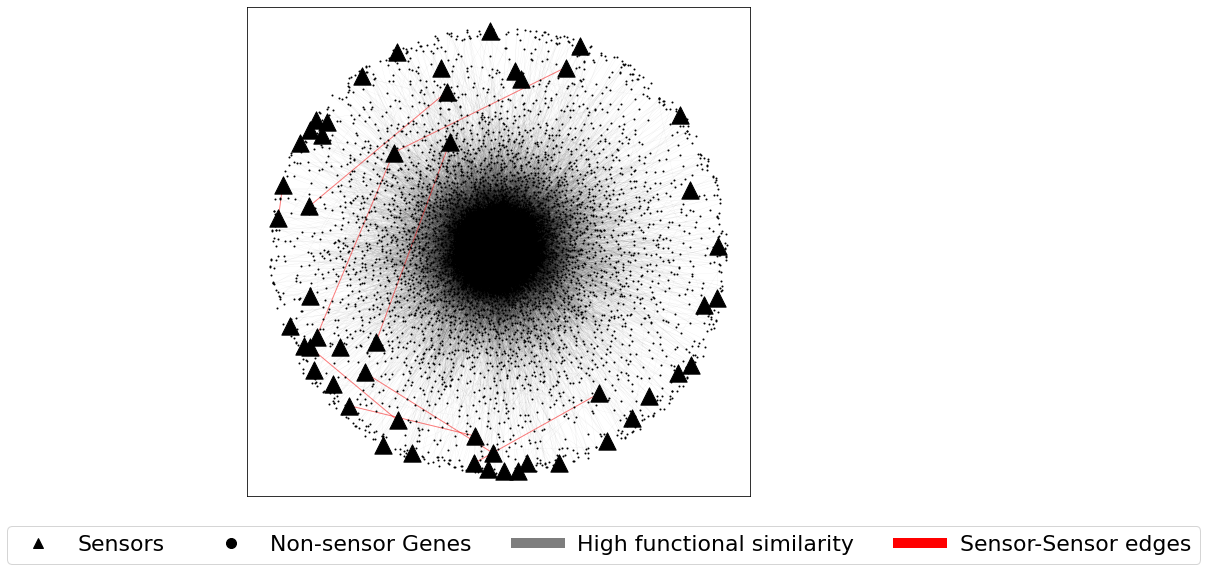

In [88]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(9,9))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_rew.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)
nx.draw_networkx_nodes(nx.induced_subgraph(e_rew.graph_gc, sensors_pcc.orf_name.tolist()),
                       pos=pos, 
                       node_color='black', alpha=1, node_shape='^')

# for itr, i in enumerate(sensor_order):
#     #print(i, effector_colors[itr])

#     orf_names_to_plot = sensors_pcc.loc[sensors_pcc.go_group==i, 'orf_name'].tolist()
#     nx.draw_networkx_nodes(e_rew.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                           node_color=sensor_colors[itr],
#                           node_shape='^',edgecolors='black',
#                           linewidths=1)
#     legend_elements.append(
#         Line2D([0], [0], marker='^', color='black', label=f'{i}',
#                               markerfacecolor=sensor_colors[itr], markersize=30, linestyle="None")
#     )
ax.set_facecolor('white')
# legend_elements.append(
#         Line2D([0], [0], marker='^', color='black', label=f'No GO Enrichment',
#                               markerfacecolor='black', markersize=30, linestyle="None")
#     )
legend_elements.extend(
    [Line2D([0], [0], marker='^', color='black', label='Sensors',
                              markerfacecolor='black', markersize=10, linestyle="None"),
     Line2D([0], [0], marker='o', color='black', label='Non-sensor Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                   
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=10),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor edges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=10)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center left', bbox_to_anchor=(-0.5, -0.1),ncol=5)
nx.draw_networkx_edges(nx.induced_subgraph(e_rew.graph_gc, sensors_pcc.orf_name.tolist()),pos=pos, edge_color='red', alpha=0.5)
plt.savefig(f'../reports/figures/paper_figures_supp/figs1.png',bbox_inches='tight',dpi=150)

In [97]:
with open('../data/supp/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)

In [119]:
e_pcc.simulate_rewire(sim_num = 100)

0


@> 5182 modes were calculated in 22.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


1


@> 5182 modes were calculated in 20.77s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


2


@> 5182 modes were calculated in 22.13s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


3


@> 5182 modes were calculated in 22.89s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


4


@> 5182 modes were calculated in 23.11s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


5


@> 5182 modes were calculated in 23.09s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


6


@> 5182 modes were calculated in 23.07s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


7


@> 5182 modes were calculated in 22.40s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


8


@> 5182 modes were calculated in 23.56s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


9


@> 5182 modes were calculated in 22.46s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


10


@> 5182 modes were calculated in 23.45s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


11


@> 5182 modes were calculated in 22.96s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


12


@> 5182 modes were calculated in 23.50s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


13


@> 5182 modes were calculated in 22.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


14


@> 5182 modes were calculated in 22.95s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


15


@> 5182 modes were calculated in 22.30s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


16


@> 5182 modes were calculated in 23.36s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


17


@> 5182 modes were calculated in 22.50s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


18


@> 5182 modes were calculated in 22.38s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


19


@> 5182 modes were calculated in 23.11s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


20


@> 5182 modes were calculated in 22.76s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


21


@> 5182 modes were calculated in 22.65s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


22


@> 5182 modes were calculated in 22.02s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


23


@> 5182 modes were calculated in 22.62s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


24


@> 5182 modes were calculated in 22.31s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


25


@> 5182 modes were calculated in 22.73s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


26


@> 5182 modes were calculated in 23.89s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


27


@> 5182 modes were calculated in 22.77s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


28


@> 5182 modes were calculated in 22.44s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


29


@> 5182 modes were calculated in 21.98s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


30


@> 5182 modes were calculated in 22.95s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 2.9s.


31


@> 5182 modes were calculated in 22.93s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


32


@> 5182 modes were calculated in 23.64s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


33


@> 5182 modes were calculated in 23.11s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


34


@> 5182 modes were calculated in 23.62s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


35


@> 5182 modes were calculated in 23.09s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


36


@> 5182 modes were calculated in 23.73s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


37


@> 5182 modes were calculated in 22.93s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


38


@> 5182 modes were calculated in 22.92s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


39


@> 5182 modes were calculated in 22.77s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


40


@> 5182 modes were calculated in 22.58s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


41


@> 5182 modes were calculated in 23.30s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


42


@> 5182 modes were calculated in 23.07s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


43


@> 5182 modes were calculated in 22.92s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


44


@> 5182 modes were calculated in 23.34s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


45


@> 5182 modes were calculated in 22.72s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


46


@> 5182 modes were calculated in 22.40s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


47


@> 5182 modes were calculated in 22.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


48


@> 5182 modes were calculated in 21.28s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


49


@> 5182 modes were calculated in 22.77s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


50


@> 5182 modes were calculated in 21.24s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


51


@> 5182 modes were calculated in 24.05s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


52


@> 5182 modes were calculated in 22.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


53


@> 5182 modes were calculated in 23.71s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


54


@> 5182 modes were calculated in 23.13s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


55


@> 5182 modes were calculated in 22.53s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


56


@> 5182 modes were calculated in 23.60s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


57


@> 5182 modes were calculated in 22.83s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


58


@> 5182 modes were calculated in 22.55s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


59


@> 5182 modes were calculated in 22.40s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


60


@> 5182 modes were calculated in 22.66s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


61


@> 5182 modes were calculated in 21.43s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


62


@> 5182 modes were calculated in 22.79s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


63


@> 5182 modes were calculated in 22.33s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


64


@> 5182 modes were calculated in 24.21s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


65


@> 5182 modes were calculated in 22.94s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


66


@> 5182 modes were calculated in 23.37s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 2.9s.


67


@> 5182 modes were calculated in 23.23s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


68


@> 5182 modes were calculated in 23.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


69


@> 5182 modes were calculated in 23.40s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


70


@> 5182 modes were calculated in 22.48s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


71


@> 5182 modes were calculated in 23.31s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


72


@> 5182 modes were calculated in 23.44s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


73


@> 5182 modes were calculated in 23.11s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


74


@> 5182 modes were calculated in 22.30s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


75


@> 5182 modes were calculated in 22.37s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


76


@> 5182 modes were calculated in 23.02s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


77


@> 5182 modes were calculated in 23.68s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


78


@> 5182 modes were calculated in 23.30s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


79


@> 5182 modes were calculated in 23.40s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


80


@> 5182 modes were calculated in 25.99s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.5s.


81


@> 5182 modes were calculated in 22.83s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


82


@> 5182 modes were calculated in 24.45s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


83


@> 5182 modes were calculated in 22.65s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


84


@> 5182 modes were calculated in 23.58s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


85


@> 5182 modes were calculated in 23.26s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


86


@> 5182 modes were calculated in 23.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


87


@> 5182 modes were calculated in 23.92s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.0s.


88


@> 5182 modes were calculated in 24.83s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 1.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


89


@> 5182 modes were calculated in 23.78s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


90


@> 5182 modes were calculated in 23.10s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.5s.


91


@> 5182 modes were calculated in 22.85s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


92


@> 5182 modes were calculated in 23.38s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


93


@> 5182 modes were calculated in 23.20s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


94


@> 5182 modes were calculated in 23.51s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


95


@> 5182 modes were calculated in 23.06s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.3s.


96


@> 5182 modes were calculated in 23.26s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.2s.


97


@> 5182 modes were calculated in 23.61s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.5s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.6s.


98


@> 5182 modes were calculated in 23.39s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.1s.


99


@> 5182 modes were calculated in 23.73s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.4s.


In [104]:
goea, geneid2name = create_goea()

../data/raw/ontology/go-basic.obo: fmt(1.2) rel(2021-05-01) 47,284 GO Terms; optional_attrs(relationship)
HMS:0:00:03.376489 119,640 annotations READ: ../data/raw/ontology/sgd.gaf MF,CC,BP

Load BP Gene Ontology Analysis ...
Propagating term counts up: is_a and negatively_regulates part_of positively_regulates regulates


46 GO IDs NOT FOUND IN ASSOCIATION: GO:0035955 GO:1900524 GO:0061416 GO:0035392 GO:1902353 GO:0001324 GO:0061404 GO:0001319 GO:0018192 GO:1900466 GO:0061427 GO:0009108 GO:1900062 GO:0035961 GO:0061393 GO:1900462 GO:1900473 GO:0061392 GO:1900472 GO:0035952 GO:0001320 GO:0018065 GO:1900526 GO:0001302 GO:0055114 GO:0001308 GO:1990872 GO:0097236 GO:1902352 GO:0034225 GO:0090203 GO:0010978 GO:0048310 GO:0071733 GO:0072321 GO:1900465 GO:0035969 GO:0072363 GO:0001300 GO:1903474 GO:1900008 GO:1900525 GO:0090202 GO:0090579 GO:0000733 GO:0051188


 82%  4,782 of  5,813 population items found in association

Load CC Gene Ontology Analysis ...
Propagating term counts up: is_a and negatively_regulates part_of positively_regulates regulates
 88%  5,097 of  5,813 population items found in association

Load MF Gene Ontology Analysis ...
Propagating term counts up: is_a and negatively_regulates part_of positively_regulates regulates


3 GO IDs NOT FOUND IN ASSOCIATION: GO:0042643 GO:0005623 GO:0005724
9 GO IDs NOT FOUND IN ASSOCIATION: GO:0048037 GO:1904162 GO:0015002 GO:0050662 GO:0001135 GO:1901916 GO:0004584 GO:0001186 GO:0001004


 72%  4,158 of  5,813 population items found in association


In [120]:
for i in e_pcc.e_list:
    i.df = pd.merge(i.df , strain_ids , left_on = 'orf_name', right_on='gene1')
    i.get_sensor_effector()
    i.analyze_components_biology(goea, geneid2name)

/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
     191 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.005667168456078216
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0015477211658482314
Sample 30 / 500: p-value 0.0020632731170778414
Sample 40 / 500: p-value 0.0061813012542468425
Sample 50 / 500: p-value 0.0020632731170778414
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.010800523557199111
Sample 80 / 500: p-value 0.0010319916829848402
Sample 90 / 500: p-value 0.0015477211658482314
Sample 100 / 500: p-value 0.0010319916829848402
Sample 110 / 500: p-value 0.004123706216515101
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.0015477211658482314
Sample 140 / 500: p-value 0.0020632731170778414
Sample 150 / 500: p-value 0.0017739322316765427
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.003093844546727288
Sample 190 / 500: p

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      38 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0015477211658482314
Sample 10 / 500: p-value 0.0046383709678282856
Sample 20 / 500: p-value 0.0010319916829848402
Sample 30 / 500: p-value 0.02660158854358043
Sample 40 / 500: p-value 0.0061813012542468425
Sample 50 / 500: p-value 1
Sample 60 / 500: p-value 0.022031650302127993
Sample 70 / 500: p-value 0.028628093994457572
Sample 80 / 500: p-value 0.03216770710150717
Sample 90 / 500: p-value 0.005152858370782808
Sample 100 / 500: p-value 0.013360562389188795
Sample 110 / 500: p-value 0.008236060186273556
Sample 120 / 500: p-value 0.01897709226853062
Sample 130 / 500: p-value 0.014383339906768208
Sample 140 / 500: p-value 0.003608864086331997
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.00037813954021165904
Sample 170 / 500: p-value 0.0014005430158296553
Sample 180 / 500: p-value 0.008236060186273556
Sample 190 / 500: p-value 0.022031650302127993
S

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      31 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0046383709678282856
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0010319916829848402
Sample 30 / 500: p-value 0.03368204806659073
Sample 40 / 500: p-value 1
Sample 50 / 500: p-value 0.0005160846378842216
Sample 60 / 500: p-value 0.003608864086331997
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.0005160846378842216
Sample 100 / 500: p-value 0.0020632731170778414
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.00669525679570547
Sample 130 / 500: p-value 0.0005160846378842216
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.024064495732734212
Sample 160 / 500: p-value 0.0010319916829848402
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.0010319916829848402
Sample 190 / 500: p-value 0.0015477211658

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['go_group'] = None
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Run BP Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
     201 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010319916829848402
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.004123706216515101
Sample 30 / 500: p-value 0.004123706216515101
Sample 40 / 500: p-value 0.0010319916829848402
Sample 50 / 500: p-value 0.0005160846378842216
Sample 60 / 500: p-value 0.0010319916829848402
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.000673117797000933
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 0.0025786475671841736
Sample 110 / 500: p-value 0.0020632731170778414
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.005667168456078216
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0002341372174259855
Sample 160 / 500: p-value 0.0020632731170778414
Sample 170 / 500: p-value 0.002737122128142385
Sample 180 / 500: p-value 1.1707676862982888e-05
Sample 190 / 500: p

  METHOD fdr:
       7 GO terms found significant (< 0.1=alpha) (  7 enriched +   0 purified): local fdr
       2 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      22 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0015477211658482314
Sample 10 / 500: p-value 0.013360562389188795
Sample 20 / 500: p-value 0.0010319916829848402
Sample 30 / 500: p-value 0.0015477211658482314
Sample 40 / 500: p-value 0.013872039547015519
Sample 50 / 500: p-value 0.0013569222728014691
Sample 60 / 500: p-value 0.0020632731170778414
Sample 70 / 500: p-value 0.006953832748741703
Sample 80 / 500: p-value 0.0010319916829848402
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 0.003093844546727288
Sample 110 / 500: p-value 0.0025786475671841736
Sample 120 / 500: p-value 0.0025786475671841736
Sample 130 / 500: p-value 0.005118743594158366
Sample 140 / 500: p-value 0.0010319916829848402
Sample 150 / 500: p-value 0.04184627253585146
Sample 160 / 500: p-value 0.008236060186273556
Sample 170 / 500: p-value 0.0020632731170778414
Sample 180 / 500: p-value 0.004171212027117064
Sample 190 / 500: p-valu

  METHOD fdr:
       2 GO terms found significant (< 0.1=alpha) (  2 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010319916829848402
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0025786475671841736
Sample 30 / 500: p-value 0.003093844546727288
Sample 40 / 500: p-value 0.0046383709678282856
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.00037813954021165904
Sample 70 / 500: p-value 0.014894463499008073
Sample 80 / 500: p-value 0.0015477211658482314
Sample 90 / 500: p-value 0.027615193215427866
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0010319916829848402
Sample 140 / 500: p-value 0.19718323301839608
Sample 150 / 500: p-value 1
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.0010319916829848402
Sample 190 / 500: p-value 0.00669525679

   2,356 GO terms are associated with  4,157 of  5,813 population items
      29 GO terms are associated with      2 of      3 study items
  METHOD fdr:
       2 GO terms found significant (< 0.1=alpha) (  2 enriched +   0 purified): local fdr
       2 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['go_group'] = None
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c


Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
     202 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0005160846378842216
Sample 10 / 500: p-value 0.0046383709678282856
Sample 20 / 500: p-value 0.000281649629354981
Sample 30 / 500: p-value 0.00026212172702189297
Sample 40 / 500: p-value 0.0005160846378842216
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.0008010898571136873
Sample 80 / 500: p-value 0.0015477211658482314
Sample 90 / 500: p-value 0.003608864086331997
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.005541262688454257
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.0015477211658482314
Sample 140 / 500: p-value 0.019995983924026604
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.003093844546727288
Sample 170 / 500: p-value 0.0025786475671841736
Sample 180 / 500: p-value 0.0010319916829848402
Sample 190 / 500: p

  METHOD fdr:
       1 GO terms found significant (< 0.1=alpha) (  1 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      49 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0046383709678282856
Sample 10 / 500: p-value 0.011796612799952547
Sample 20 / 500: p-value 0.008236060186273556
Sample 30 / 500: p-value 0.009262376723724602
Sample 40 / 500: p-value 0.0025786475671841736
Sample 50 / 500: p-value 0.0020632731170778414
Sample 60 / 500: p-value 0.005152858370782808
Sample 70 / 500: p-value 0.0025786475671841736
Sample 80 / 500: p-value 0.10979165965760543
Sample 90 / 500: p-value 0.0020632731170778414
Sample 100 / 500: p-value 0.003608864086331997
Sample 110 / 500: p-value 0.00064284631040398
Sample 120 / 500: p-value 0.005152858370782808
Sample 130 / 500: p-value 0.0046383709678282856
Sample 140 / 500: p-value 0.0010319916829848402
Sample 150 / 500: p-value 0.005152858370782808
Sample 160 / 500: p-value 0.17863123352048524
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.0020632731170778414
Sample 190 / 500: p-value 0.

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 33%      1 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      25 GO terms are associated with      1 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0046383709678282856
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0020632731170778414
Sample 30 / 500: p-value 0.0005160846378842216
Sample 40 / 500: p-value 1
Sample 50 / 500: p-value 0.09924162481215566
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.00977526936741312
Sample 80 / 500: p-value 0.00669525679570547
Sample 90 / 500: p-value 0.0025786475671841736
Sample 100 / 500: p-value 0.0010319916829848402
Sample 110 / 500: p-value 1
Sample 120 / 500: p-value 0.0025786475671841736
Sample 130 / 500: p-value 0.0020632731170778414
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0025786475671841736
Sample 160 / 500: p-value 0.0025786475671841736
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.01897709226853062
Sample 190 / 500: p-value 0.06264965035758614
Sample 200 / 500:

  METHOD fdr:
       1 GO terms found significant (< 0.1=alpha) (  1 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      60 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0014005430158296553
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0010319916829848402
Sample 30 / 500: p-value 0.0020632731170778414
Sample 40 / 500: p-value 0.0005160846378842216
Sample 50 / 500: p-value 0.0015477211658482314
Sample 60 / 500: p-value 0.004123706216515101
Sample 70 / 500: p-value 0.0046383709678282856
Sample 80 / 500: p-value 0.003093844546727288
Sample 90 / 500: p-value 0.0005160846378842216
Sample 100 / 500: p-value 0.005667168456078216
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0061813012542468425
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0025786475671841736
Sample 170 / 500: p-value 0.0005493411563659423
Sample 180 / 500: p-value 0.0005160846378842216
Sample 190 / 500: 

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      43 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.010800523557199111
Sample 10 / 500: p-value 0.003093844546727288
Sample 20 / 500: p-value 0.16871781358899954
Sample 30 / 500: p-value 0.0015477211658482314
Sample 40 / 500: p-value 0.028628093994457572
Sample 50 / 500: p-value 0.17863123352048524
Sample 60 / 500: p-value 0.008749307006844866
Sample 70 / 500: p-value 0.0013569222728014691
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.011825069820556259
Sample 100 / 500: p-value 0.013360562389188795
Sample 110 / 500: p-value 0.013872039547015519
Sample 120 / 500: p-value 0.0020632731170778414
Sample 130 / 500: p-value 0.0046383709678282856
Sample 140 / 500: p-value 0.03508500699829763
Sample 150 / 500: p-value 0.10253414987529076
Sample 160 / 500: p-value 0.0025786475671841736
Sample 170 / 500: p-value 0.06413201756012199
Sample 180 / 500: p-value 0.00669525679570547
Sample 190 / 500: p-value 0.178631

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      44 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.012848908402638772
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.09924162481215566
Sample 50 / 500: p-value 0.027615193215427866
Sample 60 / 500: p-value 0.0022625389471625343
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.0005160846378842216
Sample 100 / 500: p-value 0.005152858370782808
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.0010319916829848402
Sample 140 / 500: p-value 0.005667168456078216
Sample 150 / 500: p-value 0.00669525679570547
Sample 160 / 500: p-value 0.0025786475671841736
Sample 170 / 500: p-value 0.009262376723724602
Sample 180 / 500: p-value 0.19718323301839608
Sample 190 / 500: p-value 

  METHOD fdr:
       1 GO terms found significant (< 0.1=alpha) (  1 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      60 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.012337077556722243
Sample 10 / 500: p-value 0.0003554804304193075
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.0005160846378842216
Sample 40 / 500: p-value 0.0010319916829848402
Sample 50 / 500: p-value 3.4706844292504425e-06
Sample 60 / 500: p-value 0.0020632731170778414
Sample 70 / 500: p-value 0.0020632731170778414
Sample 80 / 500: p-value 0.07642434632046854
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 1
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.0020632731170778414
Sample 130 / 500: p-value 0.0010319916829848402
Sample 140 / 500: p-value 0.0010319916829848402
Sample 150 / 500: p-value 0.016426773975219622
Sample 160 / 500: p-value 0.0025786475671841736
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 1
Sample 190 / 500: p-value 0.005152858370782808
Sample 200 

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      22 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0020632731170778414
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0020632731170778414
Sample 30 / 500: p-value 0.004208809987878251
Sample 40 / 500: p-value 0.00669525679570547
Sample 50 / 500: p-value 0.010800523557199111
Sample 60 / 500: p-value 0.03821559152263443
Sample 70 / 500: p-value 0.006527787928646005
Sample 80 / 500: p-value 0.021460219762908884
Sample 90 / 500: p-value 0.22295150015834747
Sample 100 / 500: p-value 0.011825069820556259
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0046383709678282856
Sample 130 / 500: p-value 0.008749307006844866
Sample 140 / 500: p-value 0.003608864086331997
Sample 150 / 500: p-value 0.0025786475671841736
Sample 160 / 500: p-value 0.16871781358899954
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.02812173157595537
Sample 190 / 500: p-value 0.0025

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      27 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.00669525679570547
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.0010319916829848402
Sample 50 / 500: p-value 0.005667168456078216
Sample 60 / 500: p-value 0.0020632731170778414
Sample 70 / 500: p-value 0.0015477211658482314
Sample 80 / 500: p-value 0.003093844546727288
Sample 90 / 500: p-value 0.001013652500154252
Sample 100 / 500: p-value 0.0010319916829848402
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 1
Sample 140 / 500: p-value 0.005152858370782808
Sample 150 / 500: p-value 0.003608864086331997
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.01131288516438075
Sample 180 / 500: p-value 0.0025786475671841736
Sample 190 / 500: p-value 0.0005160846378842

  METHOD fdr:
       1 GO terms found significant (< 0.1=alpha) (  1 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)



Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      82 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0015477211658482314
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.007722636231158628
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.0025786475671841736
Sample 50 / 500: p-value 0.0015477211658482314
Sample 60 / 500: p-value 9.75751797347454e-06
Sample 70 / 500: p-value 0.0061813012542468425
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.011825069820556259
Sample 100 / 500: p-value 0.0020632731170778414
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0020632731170778414
Sample 140 / 500: p-value 0.005667168456078216
Sample 150 / 500: p-value 0.0025786475671841736
Sample 160 / 500: p-value 0.0020632731170778414
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.005152858370782808
Sample 190 / 500: p-

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      22 GO terms are associated with      3 of      3 study items
  METHOD fdr:
       2 GO terms found significant (< 0.1=alpha) (  2 enriched +   0 purified): local fdr
       2 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items fou

Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.008236060186273556
Sample 10 / 500: p-value 0.0046383709678282856
Sample 20 / 500: p-value 0.03821559152263443
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.007722636231158628
Sample 50 / 500: p-value 0.005152858370782808
Sample 60 / 500: p-value 0.003608864086331997
Sample 70 / 500: p-value 0.0015477211658482314
Sample 80 / 500: p-value 0.03972361561192556
Sample 90 / 500: p-value 0.012848908402638772
Sample 100 / 500: p-value 0.04473897664143892
Sample 110 / 500: p-value 0.005152858370782808
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.031157268019370975
Sample 140 / 500: p-value 0.0025786475671841736
Sample 150 / 500: p-value 0.015405410353951135
Sample 160 / 500: p-value 0.003093844546727288
Sample 170 / 500: p-value 0.03821559152263443
Sample 180 / 500: p-value 0.003093844546727288
Sample 190 / 500: p-value 0.00154

   2,356 GO terms are associated with  4,157 of  5,813 population items
       9 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.014894463499008073
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0015477211658482314
Sample 30 / 500: p-value 0.00820525142870192
Sample 40 / 500: p-value 0.0005160846378842216
Sample 50 / 500: p-value 0.06264965035758614
Sample 60 / 500: p-value 0.0005160846378842216
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.004123706216515101
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0046383709678282856
Sample 120 / 500: p-value 0.017957494642947026
Sample 130 / 500: p-value 0.0020632731170778414
Sample 140 / 500: p-value 1.613869482054443e-05
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0015477211658482314
Sample 170 / 500: p-value 0.0010319916829848402
Sample 180 / 500: p-value 0.0005160846378842216
Sample 190 / 500: p-va

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)



Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
     136 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0005160846378842216
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.0020632731170778414
Sample 50 / 500: p-value 0.0015477211658482314
Sample 60 / 500: p-value 0.010287984968240805
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.008749307006844866
Sample 90 / 500: p-value 0.02355654873210248
Sample 100 / 500: p-value 0.0010319916829848402
Sample 110 / 500: p-value 0.00019926748041934137
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.003093844546727288
Sample 140 / 500: p-value 0.007722636231158628
Sample 150 / 500: p-value 0.0061813012542468425
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.0005160846378842216
Sample 190 / 500: p-

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      23 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.031662575424658425
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.0005160846378842216
Sample 40 / 500: p-value 0.0013569222728014691
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.01897709226853062
Sample 80 / 500: p-value 0.005152858370782808
Sample 90 / 500: p-value 0.0020632731170778414
Sample 100 / 500: p-value 0.004123706216515101
Sample 110 / 500: p-value 0.0025786475671841736
Sample 120 / 500: p-value 3.030913835322278e-05
Sample 130 / 500: p-value 0.018467381717389545
Sample 140 / 500: p-value 0.0020632731170778414
Sample 150 / 500: p-value 0.0020632731170778414
Sample 160 / 500: p-value 0.0020632731170778414
Sample 170 / 500: p-value 0.0014448433240601708
Sample 180 / 500: p-value 0.0013569222728014691
Sample 190 / 500: p-v

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      24 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0015477211658482314
Sample 10 / 500: p-value 0.00017494952380985753
Sample 20 / 500: p-value 0.055711237190800914
Sample 30 / 500: p-value 0.040225939788653985
Sample 40 / 500: p-value 0.06659915513373693
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0005160846378842216
Sample 70 / 500: p-value 0.005152858370782808
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 0.0020632731170778414
Sample 110 / 500: p-value 0.06659915513373693
Sample 120 / 500: p-value 0.0007887593983190063
Sample 130 / 500: p-value 0.0015477211658482314
Sample 140 / 500: p-value 0.05222922762289126
Sample 150 / 500: p-value 0.010800523557199111
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.0005160846378842216
Sample 190 / 500: p-valu

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
     108 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.003093844546727288
Sample 10 / 500: p-value 0.0020632731170778414
Sample 20 / 500: p-value 0.003608864086331997
Sample 30 / 500: p-value 0.0009042856300262401
Sample 40 / 500: p-value 0.0046383709678282856
Sample 50 / 500: p-value 0.00669525679570547
Sample 60 / 500: p-value 0.0010319916829848402
Sample 70 / 500: p-value 0.00011301514733533614
Sample 80 / 500: p-value 0.0010319916829848402
Sample 90 / 500: p-value 0.000584372594190555
Sample 100 / 500: p-value 0.00029167486592765235
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.012848908402638772
Sample 130 / 500: p-value 0.018467381717389545
Sample 140 / 500: p-value 0.0015477211658482314
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0015477211658482314
Sample 170 / 500: p-value 0.00977526936741312
Sample 180 / 500: p-value 0.0025786475671841736
Sample 190 / 500: p-va

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      32 GO terms are associated with      3 of      3 study items
  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items fou

Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.011796612799952547
Sample 10 / 500: p-value 0.003608864086331997
Sample 20 / 500: p-value 0.008236060186273556
Sample 30 / 500: p-value 0.16871781358899954
Sample 40 / 500: p-value 0.0010319916829848402
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.005667168456078216
Sample 70 / 500: p-value 0.005667168456078216
Sample 80 / 500: p-value 0.0015477211658482314
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 0.04123006254611793
Sample 110 / 500: p-value 0.3889280034103956
Sample 120 / 500: p-value 0.011825069820556259
Sample 130 / 500: p-value 0.005152858370782808
Sample 140 / 500: p-value 0.011825069820556259
Sample 150 / 500: p-value 0.003093844546727288
Sample 160 / 500: p-value 0.0015477211658482314
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.0020632731170778414
Sample 190 / 500: p-value 0.022

   2,356 GO terms are associated with  4,157 of  5,813 population items
      34 GO terms are associated with      2 of      3 study items


Sample 50 / 500: p-value 0.0005160846378842216
Sample 60 / 500: p-value 0.0005160846378842216
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.005667168456078216
Sample 90 / 500: p-value 0.01897709226853062
Sample 100 / 500: p-value 0.03368204806659073
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.0020632731170778414
Sample 130 / 500: p-value 0.0005160846378842216
Sample 140 / 500: p-value 9.926379343911464e-05
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0010319916829848402
Sample 170 / 500: p-value 0.0010319916829848402
Sample 180 / 500: p-value 0.0020632731170778414
Sample 190 / 500: p-value 0.003608864086331997
Sample 200 / 500: p-value 0.0010319916829848402
Sample 210 / 500: p-value 0.015916180502580667
Sample 220 / 500: p-value 0.022031650302127993
Sample 230 / 500: p-value 0.0005160846378842216
Sample 240 / 500: p-value 0.0015477211658482314
Sample 250 / 500: p-value 0.027615193215427866
Sample

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      43 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010319916829848402
Sample 10 / 500: p-value 0.0025312633606716295
Sample 20 / 500: p-value 0.0005160846378842216
Sample 30 / 500: p-value 0.007209035111138087
Sample 40 / 500: p-value 0.005667168456078216
Sample 50 / 500: p-value 0.0020632731170778414
Sample 60 / 500: p-value 0.0010319916829848402
Sample 70 / 500: p-value 0.0020632731170778414
Sample 80 / 500: p-value 0.031157268019370975
Sample 90 / 500: p-value 0.003093844546727288
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0025786475671841736
Sample 120 / 500: p-value 0.007147354731177568
Sample 130 / 500: p-value 0.003608864086331997
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0010319916829848402
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.00042554070833035674
Sample 180 / 500: p-value 0.0020632731170778414
Sample 190 / 500: p-

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      33 GO terms are associated with      3 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.011796612799952547
Sample 10 / 500: p-value 0.06116571865000798
Sample 20 / 500: p-value 0.03821559152263443
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.0015477211658482314
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0010319916829848402
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.011825069820556259
Sample 90 / 500: p-value 0.0010319916829848402
Sample 100 / 500: p-value 3.727309214860485e-06
Sample 110 / 500: p-value 0.0061813012542468425
Sample 120 / 500: p-value 0.02016501989221685
Sample 130 / 500: p-value 0.008749307006844866
Sample 140 / 500: p-value 0.06176716970335396
Sample 150 / 500: p-value 0.013360562389188795
Sample 160 / 500: p-value 0.0020632731170778414
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.014260975053975526
Sample 190 / 500: p-value 0.

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ...100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
      41 GO terms are associated with      3 of      3 study items


Sample 50 / 500: p-value 0.0005160846378842216
Sample 60 / 500: p-value 0.01131288516438075
Sample 70 / 500: p-value 0.005667168456078216
Sample 80 / 500: p-value 0.01131288516438075
Sample 90 / 500: p-value 0.0020632731170778414
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0010319916829848402
Sample 140 / 500: p-value 1
Sample 150 / 500: p-value 0.0015477211658482314
Sample 160 / 500: p-value 0.008236060186273556
Sample 170 / 500: p-value 0.00820525142870192
Sample 180 / 500: p-value 0.005667168456078216
Sample 190 / 500: p-value 1
Sample 200 / 500: p-value 0.003093844546727288
Sample 210 / 500: p-value 0.0010319916829848402
Sample 220 / 500: p-value 0.0020632731170778414
Sample 230 / 500: p-value 0.0010319916829848402
Sample 240 / 500: p-value 0.0002526191835120817
Sample 250 / 500: p-value 0.003093844546727288
Sample 260 / 500: p-value 0.003608864086331997
S

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      97 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0046383709678282856
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0020632731170778414
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.0020632731170778414
Sample 50 / 500: p-value 0.0015477211658482314
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.003608864086331997
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0020632731170778414
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0020632731170778414
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0061813012542468425
Sample 160 / 500: p-value 0.0010319916829848402
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.003093844546727288
Sample 190 / 500:

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      17 GO terms are associated with      2 of      3 study items
  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items fou

Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010319916829848402
Sample 10 / 500: p-value 0.0005160846378842216
Sample 20 / 500: p-value 0.003093844546727288
Sample 30 / 500: p-value 0.015916180502580667
Sample 40 / 500: p-value 0.0010319916829848402
Sample 50 / 500: p-value 0.0013569222728014691
Sample 60 / 500: p-value 0.04123006254611793
Sample 70 / 500: p-value 0.0025786475671841736
Sample 80 / 500: p-value 0.005667168456078216
Sample 90 / 500: p-value 0.0015477211658482314
Sample 100 / 500: p-value 0.0015477211658482314
Sample 110 / 500: p-value 0.0061813012542468425
Sample 120 / 500: p-value 0.031662575424658425
Sample 130 / 500: p-value 0.1804407473560948
Sample 140 / 500: p-value 0.0010319916829848402
Sample 150 / 500: p-value 0.003093844546727288
Sample 160 / 500: p-value 0.0010319916829848402
Sample 170 / 500: p-value 0.010800523557199111
Sample 180 / 500: p-value 0.0002341372174259855
Sample 190 / 500: p-value 

   2,356 GO terms are associated with  4,157 of  5,813 population items
      33 GO terms are associated with      2 of      3 study items


Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0025786475671841736
Sample 30 / 500: p-value 0.0005160846378842216
Sample 40 / 500: p-value 0.0005160846378842216
Sample 50 / 500: p-value 0.027615193215427866
Sample 60 / 500: p-value 2.127690553038209e-05
Sample 70 / 500: p-value 0.0025786475671841736
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.0015477211658482314
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0005160846378842216
Sample 120 / 500: p-value 0.012337077556722243
Sample 130 / 500: p-value 0.00017494952380985753
Sample 140 / 500: p-value 0.05521433028219373
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 1
Sample 190 / 500: p-value 0.005152858370782808
Sample 200 / 500: p-value 0.0005160846378842216
Sample 210 / 500: p-value 0.05222922762289126
Sample 220 / 500: p-value 0

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      44 GO terms are associated with      2 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.009262376723724602
Sample 10 / 500: p-value 0.005667168456078216
Sample 20 / 500: p-value 0.003093844546727288
Sample 30 / 500: p-value 0.0005160846378842216
Sample 40 / 500: p-value 0.0015477211658482314
Sample 50 / 500: p-value 0.015405410353951135
Sample 60 / 500: p-value 0.004123706216515101
Sample 70 / 500: p-value 0.0020632731170778414
Sample 80 / 500: p-value 0.0010319916829848402
Sample 90 / 500: p-value 0.005152858370782808
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0015477211658482314
Sample 120 / 500: p-value 0.0015477211658482314
Sample 130 / 500: p-value 0.0002077229874698903
Sample 140 / 500: p-value 0.003608864086331997
Sample 150 / 500: p-value 0.0005160846378842216
Sample 160 / 500: p-value 0.0005160846378842216
Sample 170 / 500: p-value 0.02101416985363285
Sample 180 / 500: p-value 0.003608864086331997
Sample 190 / 500: p-value

  METHOD fdr:
       3 GO terms found significant (< 0.1=alpha) (  3 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ... 67%      2 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
      23 GO terms are associated with      2 of      3 study items
  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ... 33%      1 of      3 study items found in association
100%      3 of      3 study items fou

Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.003608864086331997
Sample 10 / 500: p-value 0.008749307006844866
Sample 20 / 500: p-value 0.029640291125957147
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.09683232225139732
Sample 50 / 500: p-value 0.0005160846378842216
Sample 60 / 500: p-value 0.0020632731170778414
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.0015477211658482314
Sample 90 / 500: p-value 0.004123706216515101
Sample 100 / 500: p-value 0.04674022119262763
Sample 110 / 500: p-value 0.013872039547015519
Sample 120 / 500: p-value 0.00669525679570547
Sample 130 / 500: p-value 0.013872039547015519
Sample 140 / 500: p-value 0.07935840026626816
Sample 150 / 500: p-value 0.0010319916829848402
Sample 160 / 500: p-value 0.003608864086331997
Sample 170 / 500: p-value 0.003093844546727288
Sample 180 / 500: p-value 0.003608864086331997
Sample 190 / 500: p-value 0.0199

   2,356 GO terms are associated with  4,157 of  5,813 population items
       9 GO terms are associated with      1 of      3 study items


Sample 40 / 500: p-value 0.0813109799307505
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0015477211658482314
Sample 70 / 500: p-value 0.0046383709678282856
Sample 80 / 500: p-value 0.0020632731170778414
Sample 90 / 500: p-value 0.0005160846378842216
Sample 100 / 500: p-value 0.0010319916829848402
Sample 110 / 500: p-value 0.0020632731170778414
Sample 120 / 500: p-value 0.00017494952380985753
Sample 130 / 500: p-value 0.00037813954021165904
Sample 140 / 500: p-value 0.0005160846378842216
Sample 150 / 500: p-value 0.0046383709678282856
Sample 160 / 500: p-value 0.0010319916829848402
Sample 170 / 500: p-value 0.0010319916829848402
Sample 180 / 500: p-value 0.0020632731170778414
Sample 190 / 500: p-value 0.0005160846378842216
Sample 200 / 500: p-value 0.0015477211658482314
Sample 210 / 500: p-value 0.027615193215427866
Sample 220 / 500: p-value 0.0015477211658482314
Sample 230 / 500: p-value 0.19718323301839608
Sample 240 / 500: p-value 1
Sample 250 / 500: p-va

  METHOD fdr:
       2 GO terms found significant (< 0.1=alpha) (  2 enriched +   0 purified): local fdr
       1 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run BP Gene Ontology Analysis: current study set of 3 IDs ... 33%      1 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 5,048 uncorrected p-values using fisher
   5,048 GO terms are associated with  4,756 of  5,813 population items
      27 GO terms are associated with      1 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.00202927511584895
Sample 10 / 500: p-value 0.0010319916829848402
Sample 20 / 500: p-value 0.0025786475671841736
Sample 30 / 500: p-value 0.008236060186273556
Sample 40 / 500: p-value 0.0015477211658482314
Sample 50 / 500: p-value 0.0010319916829848402
Sample 60 / 500: p-value 0.0005160846378842216
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.0010319916829848402
Sample 90 / 500: p-value 0.0025786475671841736
Sample 100 / 500: p-value 0.005152858370782808
Sample 110 / 500: p-value 7.984340641085087e-06
Sample 120 / 500: p-value 0.0005160846378842216
Sample 130 / 500: p-value 0.0010319916829848402
Sample 140 / 500: p-value 0.0010319916829848402
Sample 150 / 500: p-value 0.0010319916829848402
Sample 160 / 500: p-value 0.0015477211658482314
Sample 170 / 500: p-value 0.0005160846378842216
Sample 180 / 500: p-value 0.0010319916829848402
Sample 190 / 500: p

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 3 IDs ... 33%      1 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 1,024 uncorrected p-values using fisher
   1,024 GO terms are associated with  5,096 of  5,813 population items
       9 GO terms are associated with      1 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0010319916829848402
Sample 10 / 500: p-value 0.0015477211658482314
Sample 20 / 500: p-value 0.04184627253585146
Sample 30 / 500: p-value 0.0010319916829848402
Sample 40 / 500: p-value 0.003093844546727288
Sample 50 / 500: p-value 0.04184627253585146
Sample 60 / 500: p-value 0.0007518102579129916
Sample 70 / 500: p-value 0.0005160846378842216
Sample 80 / 500: p-value 0.2107971624905681
Sample 90 / 500: p-value 0.005152858370782808
Sample 100 / 500: p-value 0.0005160846378842216
Sample 110 / 500: p-value 0.0015477211658482314
Sample 120 / 500: p-value 0.0010319916829848402
Sample 130 / 500: p-value 0.0005160846378842216
Sample 140 / 500: p-value 7.700470291999264e-05
Sample 150 / 500: p-value 0.0015477211658482314
Sample 160 / 500: p-value 0.012848908402638772
Sample 170 / 500: p-value 0.0015477211658482314
Sample 180 / 500: p-value 0.0025786475671841736
Sample 190 / 500: p-value

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run MF Gene Ontology Analysis: current study set of 3 IDs ...  0%      0 of      3 study items found in association
100%      3 of      3 study items found in population(5813)
Calculating 2,356 uncorrected p-values using fisher
   2,356 GO terms are associated with  4,157 of  5,813 population items
       0 GO terms are associated with      0 of      3 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.0015477211658482314
Sample 10 / 500: p-value 7.187932803445273e-05
Sample 20 / 500: p-value 0.005152858370782808
Sample 30 / 500: p-value 0.0015477211658482314
Sample 40 / 500: p-value 0.0015477211658482314
Sample 50 / 500: p-value 0.0030874250152081004
Sample 60 / 500: p-value 0.06659915513373693
Sample 70 / 500: p-value 0.0010319916829848402
Sample 80 / 500: p-value 0.0005160846378842216
Sample 90 / 500: p-value 0.005152858370782808
Sample 100 / 500: p-value 0.003093844546727288
Sample 110 / 500: p-value 0.0010319916829848402
Sample 120 / 500: p-value 0.0015477211658482314
Sample 130 / 500: p-value 0.003608864086331997
Sample 140 / 500: p-value 0.04423822824557781
Sample 150 / 500: p-value 1
Sample 160 / 500: p-value 0.0046383709678282856
Sample 170 / 500: p-value 0.0010319916829848402
Sample 180 / 500: p-value 0.003608864086331997
Sample 190 / 500: p-value 0.0005160846378842

  METHOD fdr:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): local fdr
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [128]:
res = [i.sensors_df.dropna(subset=['sensor_cluster']).sensor_cluster.nunique() for i in e_pcc.e_list]

In [142]:
res2 = [i.sensors_df.dropna(subset=['go_group']).go_group.nunique() for i in e_pcc.e_list]

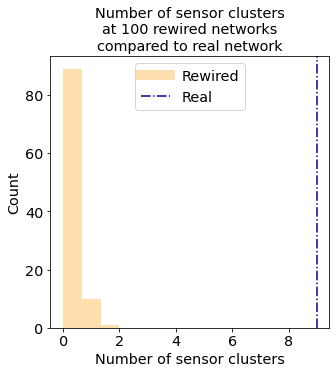

In [176]:
fig, ax =plt.subplots(figsize=(5,5))
ax.hist(res,3,color='navajowhite')
ax.set_xlabel('Number of sensor clusters')
ax.set_ylabel('Count')
ax.set_title('Number of sensor clusters\nat 100 rewired networks\ncompared to real network')
ax.axvline(9,c='darkblue',linestyle='-.')
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

fig.savefig('../reports/figures/paper_figures_supp/rewired_sensor_count.png', bbox_inches='tight',dpi=150)
